In [1]:
import charts_function_list
import os

In [2]:
base,data,outputs = charts_function_list.folder_setup()
os.chdir(data)
monuments = pd.read_csv('monuments.csv',encoding='ISO-8859-1')

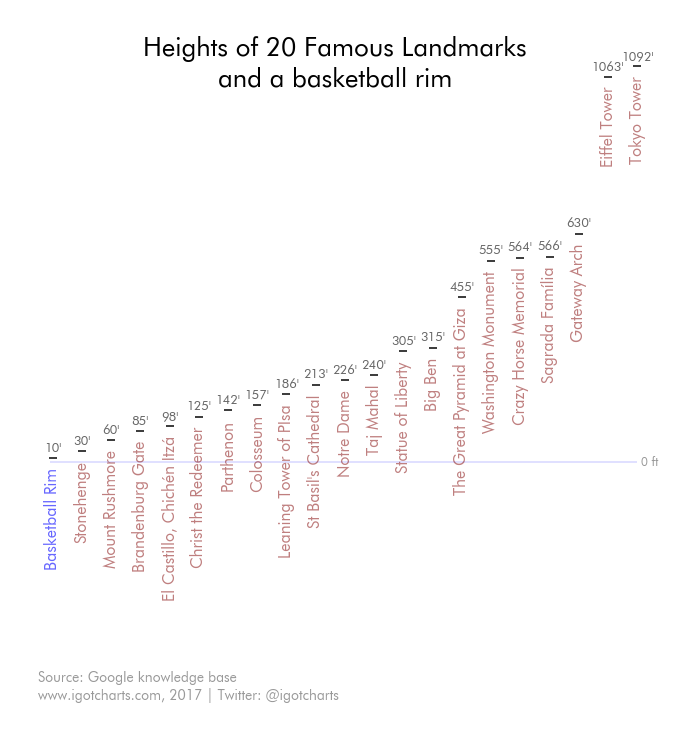

In [3]:
#font
plt.rcParams["font.family"] = 'Futura Bk BT'

#chart object and sorted DF
monument_chart = charts_function_list.chart_maker('Heights of 20 Famous Landmarks\nand a basketball rim',title_size=26)
monuments=monuments.sort_values(by='Height of object').reset_index(drop=True)

#fig and ax set
fig = monument_chart.initial_fig_axis((11,8))
fig.suptitle(monument_chart.title,y=.9,fontsize=26)
ax = monument_chart.axes_set_up(fig)


#basketball rim
plt.scatter(-1,10,marker='_',color='black',s=50)
ax.text(-1,-15,"Basketball Rim",alpha=.6,color='blue',ha='center',va='top',rotation=90,fontsize=16)
ax.text(-1,30,str(10)+'\'',ha='center',fontsize=13,alpha=.6)

#monuments and labels
plt.scatter(monuments.index,monuments['Height of object'],marker='_',color='black',s=50)
for item in range(len(monuments)):
    ax.text(monuments.index[item],monuments['Height of object'][item]-25,
            monuments['Monument/Structure'][item],ha='center',rotation=90,va='top',fontsize=16,color='maroon',alpha=.5,zorder=2)
    
    ax.text(monuments.index[item],monuments['Height of object'][item]+20,str(monuments['Height of object'][item])+'\'',ha='center',fontsize=13,alpha=.6)


#ticks
monument_chart.x_axis_setup(ax,-1.5,len(monuments)-.5,interval=1)
ax.set_xticks([])
ax.grid(False)
ax.set_yticks([0])

#horizontal line at 0
ax.hlines(0,xmin=-1.1,xmax=len(monuments)-1,linewidth=.4,alpha=.6,color='blue')

#default tick parameters
monument_chart.tick_params_(ax)

#add ytick label for 0 ft after
ax.set_yticklabels(["0 ft"],fontsize=12,va='center',position=(1.01,0))

#citation
monument_chart.citations(ax,source='Source: Google knowledge base',source_y=-.46)

#safe chart
os.chdir(outputs)
charts_function_list.chart_save('Monuments')
plt.show()